In [412]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [413]:
sales = pd.read_excel('sales.xlsx')
sales

,CustomerID,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
0,11054,2021-03-18 00:00:00,85.0,7230.0,1820,3435.0,1600.0,440.0,57.0,1,13,4,13,6,0
1,17117,2021-03-01 00:00:00,96.0,5850.0,320,2745.0,500.0,320.0,8.0,3,9,7,9,6,0
2,31751,2021-11-01 00:00:00,7.0,8380.0,0,1560.0,0.0,0.0,28.0,3,9,5,3,9,0
3,12947,2022-05-19 00:00:00,54.0,5090.0,280,2355.0,140.0,560.0,78.0,3,7,5,11,3,0
4,11402,2021-01-01 00:00:00,64.0,330.0,0,240.0,0.0,0.0,7.0,2,4,1,3,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,23699,2021-11-27 00:00:00,54.0,290.0,20,180.0,0.0,40.0,4.0,2,4,1,4,7,0
7004,23255,2021-03-25 00:00:00,27.0,230.0,80,525.0,20.0,80.0,23.0,3,5,1,3,8,0
7005,5798,2022-04-12 00:00:00,36.0,3050.0,2460,3840.0,1800.0,980.0,107.0,1,8,4,13,4,0
7006,16577,2020-09-01 00:00:00,49.0,20.0,200,90.0,160.0,0.0,14.0,1,3,2,2,8,1


In [414]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [415]:
sales.set_index ('CustomerID', inplace = True)

In [416]:
#check for duplicates 
#sales [sales.duplicated()]
sales.drop_duplicates(inplace= True)

In [417]:
sales.shape

(7000, 14)

In [418]:
#Impute MntDrinks

sales_products = sales[['MntDrinks','MntDesserts','MntEntries','MntVegan&Vegetarian']] # we are using this variables to impute in drinks because they have a corr>0.7

imputer = KNNImputer(n_neighbors=1)
array_impute = imputer.fit_transform(sales_products) # this is an array
sales_products = pd.DataFrame(array_impute, columns = sales_products.columns)

sales['MntDrinks'] = sales_products['MntDrinks'].values

In [419]:
#Input recency com a média
sales.fillna({'Recency': sales['Recency'].mean}, inplace = True)

In [420]:
#sales.isna().sum()

INFO : 6 float variables; 8 integer variables; 1 object variable

In [421]:
#recency está em object tem de passar para integer
#sales["Recency"] = sales["Recency"].astype(str).astype(float)
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 11054 to 25310
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date_Adherence         7000 non-null   object 
 1   Recency                7000 non-null   object 
 2   MntMeat&Fish           7000 non-null   float64
 3   MntEntries             7000 non-null   int64  
 4   MntVegan&Vegetarian    7000 non-null   float64
 5   MntDrinks              7000 non-null   float64
 6   MntDesserts            7000 non-null   float64
 7   MntAdditionalRequests  7000 non-null   float64
 8   NumOfferPurchases      7000 non-null   int64  
 9   NumAppPurchases        7000 non-null   int64  
 10  NumTakeAwayPurchases   7000 non-null   int64  
 11  NumStorePurchases      7000 non-null   int64  
 12  NumAppVisitsMonth      7000 non-null   int64  
 13  Complain               7000 non-null   int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 82

## Outliers

In [422]:
#sales.hist(sales['Recency'])
#sns.histplot(data = sales, x = 'Recency', color="g", bins = 10)

In [423]:
sales_NO = sales.copy()

In [424]:
sales_NO = sales_NO.drop(sales_NO[sales_NO['NumTakeAwayPurchases'] > 20].index)

## Clusters - Perspectiva preferência pela via de consumo (APP,TK AWAY, STORE)

Identify the right number of clusters

In [425]:
#Criar subset com as variáveis que vão contribuir para os clusters
sales_vc = sales_NO[[ 'NumAppPurchases','NumTakeAwayPurchases', 'NumStorePurchases',]].copy()
sales_vc

,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases
CustomerID,,,
11054,13,4,13
17117,9,7,9
31751,9,5,3
12947,7,5,11
11402,4,1,3
...,...,...,...
23699,4,1,4
23255,5,1,3
5798,8,4,13


In [426]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the scaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data_standard = scaler.fit_transform(sales_vc)


In [427]:
from sklearn.preprocessing import MinMaxScaler


# Create an instance of the scaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(sales_vc)

In [428]:
# create new dataframe with scaled data
sales_vc_minmax = pd.DataFrame(scaled_data, columns=['NumAppPurchases','NumTakeAwayPurchases', 'NumStorePurchases'])

In [429]:
sales_vc_minmax.head(10)

,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases
0,1.000000,0.333333,1.000000
1,0.692308,0.583333,0.692308
2,0.692308,0.416667,0.230769
3,0.538462,0.416667,0.846154
4,0.307692,0.083333,0.230769
5,0.461538,0.250000,0.230769
6,0.538462,0.750000,0.615385
7,0.538462,0.333333,0.307692
8,0.230769,0.083333,0.230769
9,0.923077,0.166667,0.615385


In [430]:
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k).fit(sales_vc_minmax)
    inertias.append(model.inertia_)

C:\Users\J Loureiro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\J Loureiro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\J Loureiro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\J Loureiro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\J Loureiro\anaconda3\lib\si

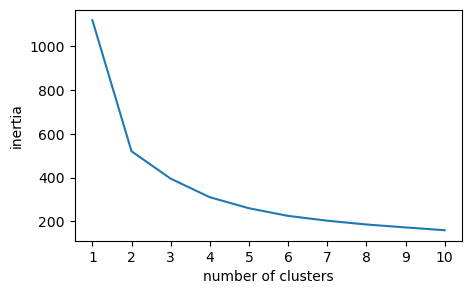

In [431]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for the x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for the y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks on the x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

C:\Users\J Loureiro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\J Loureiro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\J Loureiro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\J Loureiro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\J Loureiro\anaconda3\lib\si

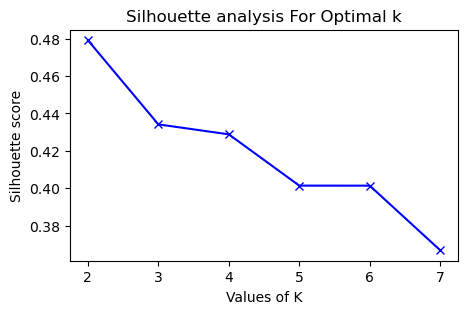

In [432]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

range_n_clusters = [2, 3, 4, 5, 6, 7]
silhouette_avg = []
for num_clusters in range_n_clusters:

    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(sales_vc_minmax)
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg.append(silhouette_score(sales_vc_minmax, cluster_labels))

plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

The optimal K with the Silhouette method is 2! 

The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation). 
https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/

Testar K= 2; 3; 4 

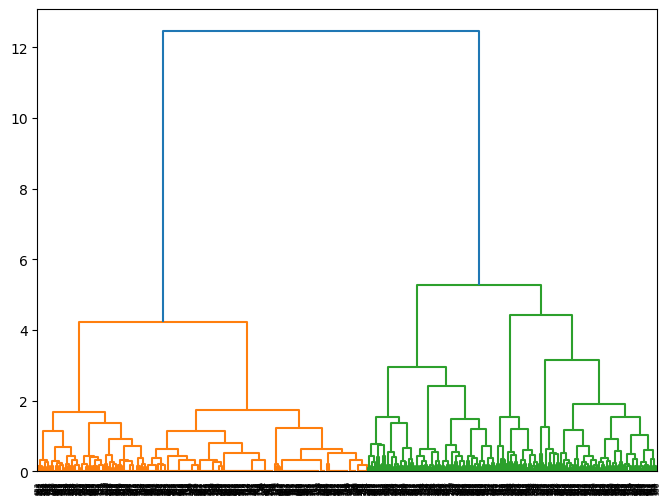

In [433]:
    from scipy.cluster import hierarchy
#from sklearn.cluster import AgglomerativeClustering - The option available in sklearn

# Get a random sample, as hierarchical clustering can take a lot of time to run.
sales_vc_sample = sales_vc_minmax.sample(n = 1000, random_state = 100)

# create clusters using the "ward method"
clusters = hierarchy.linkage(sales_vc_sample , method="ward")

# create the dendrogram using the hierarchy.dendrogram() method.
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)

## 2 Clusters (K=2)

In [434]:
sales_vc_k2 = sales_vc_minmax.copy()
model_k2 = KMeans(n_clusters=2, random_state = 100).fit(sales_vc_k2)

C:\Users\J Loureiro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [435]:
sales_vc_k2['k_label'] = model_k2.labels_

In [436]:
sales_vc_k2.groupby(['k_label']).mean().transpose()

k_label,0,1
NumAppPurchases,0.331160,0.609301
NumTakeAwayPurchases,0.139817,0.480055
NumStorePurchases,0.259267,0.649380


In [437]:
sales_vc_k2.groupby(['k_label']).describe().transpose()

k_label                               0            1
NumAppPurchases      count  3563.000000  3376.000000
                     mean      0.331160     0.609301
                     std       0.126555     0.180388
                     min       0.000000     0.230769
                     25%       0.230769     0.461538
                     50%       0.307692     0.615385
                     75%       0.384615     0.769231
                     max       0.846154     1.000000
NumTakeAwayPurchases count  3563.000000  3376.000000
                     mean      0.139817     0.480055
                     std       0.077290     0.215570
                     min       0.000000     0.166667
                     25%       0.083333     0.333333
                     50%       0.083333     0.416667
                     75%       0.166667     0.583333
                     max       0.583333     1.000000
NumStorePurchases    count  3563.000000  3376.000000
                     mean      0.259267     0.649380
                     std       0.098824     0.204103
                     min       0.000000     0.230769
                     25%       0.230769     0.461538
                     50%       0.230769     0.615385
                     75%       0.307692     0.846154
                     max       0.615385     1.000000

## 3 Clusters (K=3) 

In [438]:
sales_vc_k3 = sales_vc_minmax.copy()
model_k3 = KMeans(n_clusters=3, random_state = 100).fit(sales_vc_k3)

C:\Users\J Loureiro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [439]:
sales_vc_k3['k_label'] = model_k3.labels_

In [440]:
sales_vc_k3.groupby(['k_label']).mean().transpose()

k_label,0,1,2
NumAppPurchases,0.313308,0.532468,0.657535
NumTakeAwayPurchases,0.134917,0.675587,0.313974
NumStorePurchases,0.247175,0.671722,0.607649


Ordem de grandeza do clusters (n.º de individuos) : 2 < 0 < 1 

- C0 compra mais na app e na loja (grupo de clientes regulares)
- C1 é o que tem mais gentes mas o que consome menos (clientes não regulares)
- C2 compra mais no TK Away, mas o cluster que consome mais no geral (grupo de clientes regulares que previligiam o TK Away)


In [441]:
descr = sales_vc_k3.groupby(['k_label']).describe().transpose()
descr

k_label                               0            1            2
NumAppPurchases      count  3315.000000  1476.000000  2148.000000
                     mean      0.313308     0.532468     0.657535
                     std       0.108212     0.153899     0.173497
                     min       0.000000     0.230769     0.230769
                     25%       0.230769     0.384615     0.538462
                     50%       0.307692     0.538462     0.615385
                     75%       0.384615     0.615385     0.769231
                     max       0.692308     1.000000     1.000000
NumTakeAwayPurchases count  3315.000000  1476.000000  2148.000000
                     mean      0.134917     0.675587     0.313974
                     std       0.077250     0.158487     0.103924
                     min       0.000000     0.333333     0.083333
                     25%       0.083333     0.583333     0.250000
                     50%       0.083333     0.666667     0.333333
                     75%       0.166667     0.750000     0.416667
                     max       0.583333     1.000000     0.666667
NumStorePurchases    count  3315.000000  1476.000000  2148.000000
                     mean      0.247175     0.671722     0.607649
                     std       0.087665     0.219730     0.193276
                     min       0.000000     0.230769     0.153846
                     25%       0.230769     0.461538     0.461538
                     50%       0.230769     0.692308     0.615385
                     75%       0.307692     0.846154     0.769231
                     max       0.615385     1.000000     1.000000

## 4 Clusters (K=4) --> SOLUÇÃO

In [442]:
sales_vc_k4 = sales_vc_minmax.copy()
model_k4 = KMeans(n_clusters=4, random_state = 100).fit(sales_vc_k4)

C:\Users\J Loureiro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [443]:
sales_vc_k4['k_label'] = model_k4.labels_

In [444]:
sales_vc_k4.groupby(['k_label']).mean().transpose()

k_label,0,1,2,3
NumAppPurchases,0.540593,0.293725,0.621692,0.598524
NumTakeAwayPurchases,0.722864,0.122646,0.281059,0.470787
NumStorePurchases,0.496802,0.233330,0.480946,0.851036


Ordem de grandeza do clusters (n.º de individuos) : 3 < 2 < 1 < 0

- C0 (geral_avg~8)  APP e Loja está mais equilibrado e que menos consome TK Away; é o grupo que tem mais individuos (Menos regulares)
- C1 (geral_avg~19) Consome mais na APP
- C2 (geral_avg~24) consome mais na loja, é o que consome mais na loja, são clientes regulares
- C3 (geral_avg=24) consome maioritariamente TK Away (praticamente só Tk Away e nada na app e loja) grupo de clientes regulares que previligiam o TK Away, "habituais"); A mediana é =0 para a compra na APP e na Loja


In [445]:
sales_vc_k4.groupby(['k_label']).describe().transpose()

k_label                              0            1            2            3
NumAppPurchases      count  866.000000  2974.000000  1744.000000  1355.000000
                     mean     0.540593     0.293725     0.621692     0.598524
                     std      0.155951     0.092101     0.169122     0.183748
                     min      0.230769     0.000000     0.230769     0.230769
                     25%      0.461538     0.230769     0.461538     0.461538
                     50%      0.538462     0.307692     0.615385     0.538462
                     75%      0.615385     0.384615     0.769231     0.692308
                     max      1.000000     0.538462     1.000000     1.000000
NumTakeAwayPurchases count  866.000000  2974.000000  1744.000000  1355.000000
                     mean     0.722864     0.122646     0.281059     0.470787
                     std      0.154523     0.062403     0.100195     0.173401
                     min      0.500000     0.000000     0.083333     0.250000
                     25%      0.583333     0.083333     0.166667     0.333333
                     50%      0.666667     0.083333     0.250000     0.416667
                     75%      0.833333     0.166667     0.333333     0.583333
                     max      1.000000     0.500000     0.583333     1.000000
NumStorePurchases    count  866.000000  2974.000000  1744.000000  1355.000000
                     mean     0.496802     0.233330     0.480946     0.851036
                     std      0.154932     0.076361     0.121340     0.102892
                     min      0.230769     0.000000     0.153846     0.615385
                     25%      0.384615     0.230769     0.384615     0.769231
                     50%      0.461538     0.230769     0.461538     0.846154
                     75%      0.615385     0.307692     0.615385     0.923077
                     max      0.923077     0.615385     0.692308     1.000000

## Visualização

HISTOGRAMAS

In [446]:
cluster0 = sales_vc_k4[sales_vc_k4.k_label==0]
cluster1 = sales_vc_k4[sales_vc_k4.k_label==1]
cluster2 = sales_vc_k4[sales_vc_k4.k_label==2]
cluster3 = sales_vc_k4[sales_vc_k4.k_label==3]

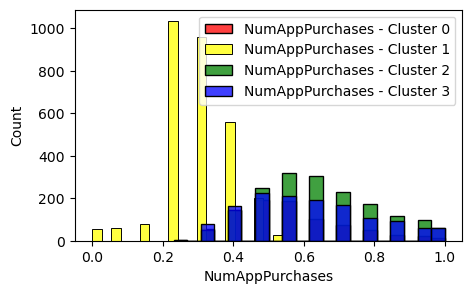

In [447]:
sns.histplot(cluster0['NumAppPurchases'],color='red',label='NumAppPurchases - Cluster 0', bins = 20)
sns.histplot(cluster1['NumAppPurchases'],color='yellow',label='NumAppPurchases - Cluster 1', bins = 20)
sns.histplot(cluster2['NumAppPurchases'],color='green',label='NumAppPurchases - Cluster 2', bins = 20)
sns.histplot(cluster3['NumAppPurchases'],color='blue',label='NumAppPurchases - Cluster 3', bins = 20)
plt.legend()

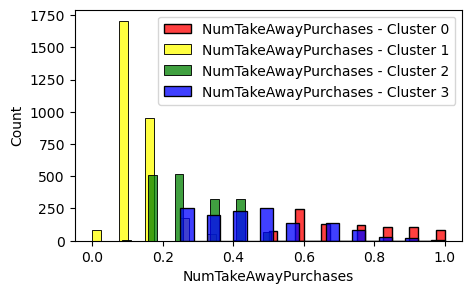

In [448]:
sns.histplot(cluster0['NumTakeAwayPurchases'],color='red',label='NumTakeAwayPurchases - Cluster 0', bins = 20)
sns.histplot(cluster1['NumTakeAwayPurchases'],color='yellow',label='NumTakeAwayPurchases - Cluster 1', bins = 20)
sns.histplot(cluster2['NumTakeAwayPurchases'],color='green',label='NumTakeAwayPurchases - Cluster 2', bins = 20)
sns.histplot(cluster3['NumTakeAwayPurchases'],color='blue',label='NumTakeAwayPurchases - Cluster 3', bins = 20)
plt.legend()

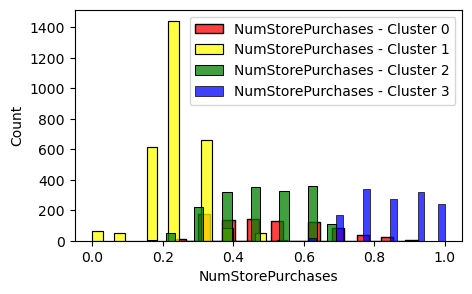

In [449]:
sns.histplot(cluster0['NumStorePurchases'],color='red',label='NumStorePurchases - Cluster 0', bins = 20)
sns.histplot(cluster1['NumStorePurchases'],color='yellow',label='NumStorePurchases - Cluster 1', bins = 20)
sns.histplot(cluster2['NumStorePurchases'],color='green',label='NumStorePurchases - Cluster 2', bins = 20)
sns.histplot(cluster3['NumStorePurchases'],color='blue',label='NumStorePurchases - Cluster 3', bins = 20)
plt.legend()

SCATTER PLOT

In [450]:
centroids = model_k4.cluster_centers_
centroids

array([[0.54059336, 0.72286374, 0.49680227],
       [0.2937251 , 0.12264627, 0.23332988],
       [0.62117595, 0.28055556, 0.4806366 ],
       [0.59925284, 0.47087319, 0.85034245]])

In [451]:
sales_vc_minmax.columns

Index(['NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases'], dtype='object')

In [452]:
centroid_0_APP = centroids[0,0]
centroid_1_APP = centroids[1,0]
centroid_2_APP = centroids[2,0]
centroid_3_APP = centroids[3,0]
centroid_0_STORE = centroids[0,1]
centroid_1_STORE = centroids[1,1]
centroid_2_STORE = centroids[2,1]
centroid_3_STORE = centroids[3,1]
centroid_0_TKAWAY = centroids[0,2]
centroid_1_TKAWAY = centroids[1,2]
centroid_2_TKAWAY = centroids[2,2]
centroid_3_TKAWAY = centroids[3,2]

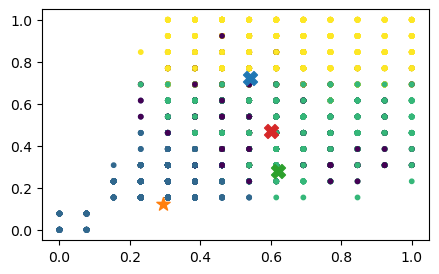

In [453]:
plt.scatter(sales_vc_k4.NumAppPurchases, sales_vc_k4.NumStorePurchases,
            c=sales_vc_k4.k_label, s=10)

plt.scatter(centroid_0_APP, centroid_0_STORE, marker='X', s=100)#AZUL
plt.scatter(centroid_1_APP, centroid_1_STORE, marker='*', s=100)#LARANJA
plt.scatter(centroid_2_APP, centroid_2_STORE, marker='X', s=100)#VERDE
plt.scatter(centroid_3_APP, centroid_3_STORE, marker='X', s=100)#VERMELHO

plt.show()

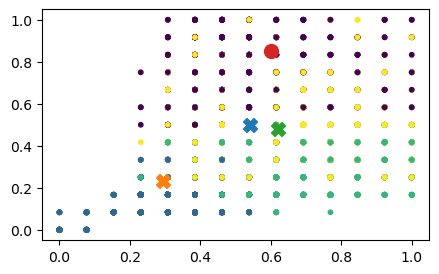

In [454]:
plt.scatter(sales_vc_k4.NumAppPurchases, sales_vc_k4.NumTakeAwayPurchases,
            c=sales_vc_k4.k_label, s=10)

plt.scatter(centroid_0_APP, centroid_0_TKAWAY, marker='X', s=100)
plt.scatter(centroid_1_APP, centroid_1_TKAWAY, marker='X', s=100)
plt.scatter(centroid_2_APP, centroid_2_TKAWAY, marker='X', s=100)
plt.scatter(centroid_3_APP, centroid_3_TKAWAY, marker='o', s=100)

plt.show()

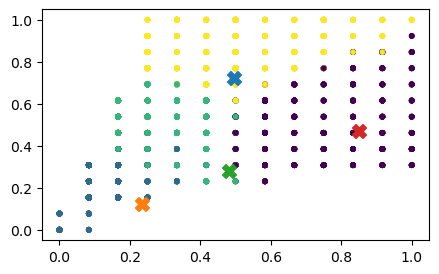

In [455]:
plt.scatter(sales_vc_k4.NumTakeAwayPurchases, sales_vc_k4.NumStorePurchases,
            c=sales_vc_k4.k_label, s=10)

plt.scatter(centroid_0_TKAWAY, centroid_0_STORE, marker='X', s=100)
plt.scatter(centroid_1_TKAWAY, centroid_1_STORE, marker='X', s=100)
plt.scatter(centroid_2_TKAWAY, centroid_2_STORE, marker='X', s=100)
plt.scatter(centroid_3_TKAWAY, centroid_3_STORE, marker='X', s=100)

plt.show()

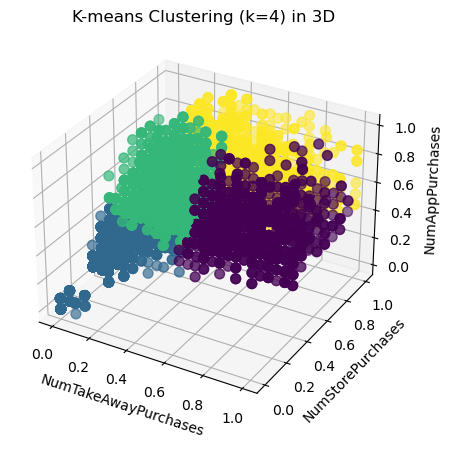

In [456]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5, 9))
ax = fig.add_subplot(111, projection='3d')

x = sales_vc_k4.NumTakeAwayPurchases
y = sales_vc_k4.NumStorePurchases
z = sales_vc_k4.NumAppPurchases
c = sales_vc_k4.k_label

ax.scatter(x, y, z, c=c, s=50)

ax.set_xlabel('NumTakeAwayPurchases')
ax.set_ylabel('NumStorePurchases')
ax.set_zlabel('NumAppPurchases')

plt.title("K-means Clustering (k=4) in 3D")
plt.show()


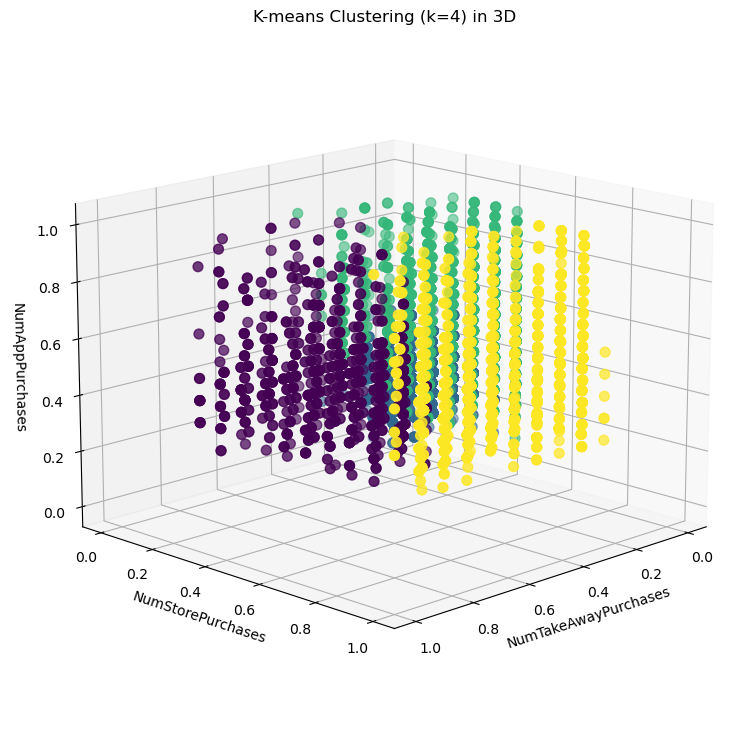

In [457]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

x = sales_vc_k4.NumTakeAwayPurchases
y = sales_vc_k4.NumStorePurchases
z = sales_vc_k4.NumAppPurchases
c = sales_vc_k4.k_label

ax.scatter(x, y, z, c=c, s=50)

ax.set_xlabel('NumTakeAwayPurchases')
ax.set_ylabel('NumStorePurchases')
ax.set_zlabel('NumAppPurchases')

# Change the angle
ax.view_init(elev=15, azim=45)

plt.title("K-means Clustering (k=4) in 3D")
plt.show()


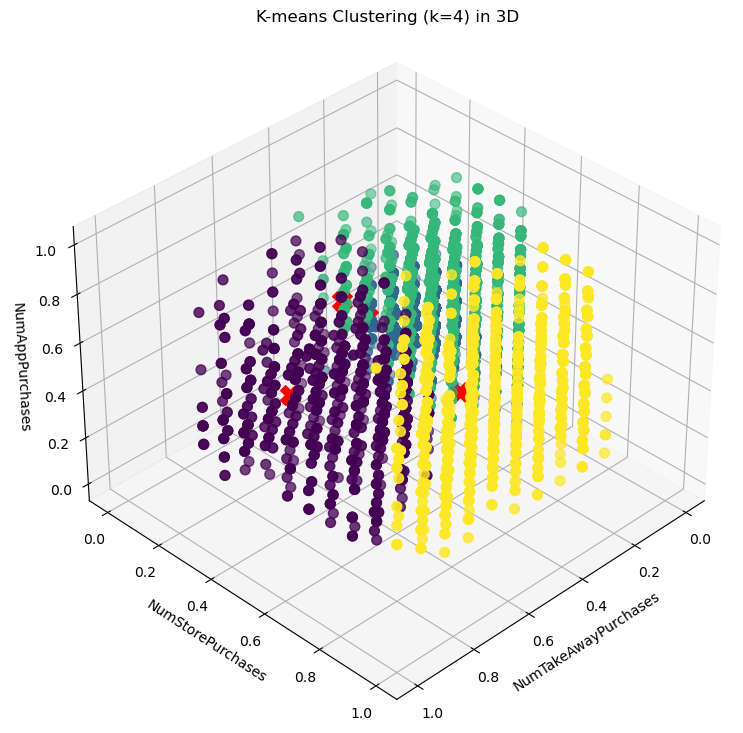

In [458]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

x = sales_vc_k4.NumTakeAwayPurchases
y = sales_vc_k4.NumStorePurchases
z = sales_vc_k4.NumAppPurchases
c = sales_vc_k4.k_label

ax.scatter(x, y, z, c=c, s=50)

# Add centroids
ax.scatter(centroid_0_TKAWAY, centroid_0_STORE, centroid_0_APP, marker='X', s=200, c='red')
ax.scatter(centroid_1_TKAWAY, centroid_1_STORE, centroid_1_APP, marker='X', s=200, c='red')
ax.scatter(centroid_2_TKAWAY, centroid_2_STORE, centroid_2_APP, marker='X', s=200, c='red')
ax.scatter(centroid_3_TKAWAY, centroid_3_STORE, centroid_3_APP, marker='X', s=200, c='red')

ax.set_xlabel('NumTakeAwayPurchases')
ax.set_ylabel('NumStorePurchases')
ax.set_zlabel('NumAppPurchases')

# Change the angle
ax.view_init(elev=35, azim=45) #change elevation to check the centroids a bit better

plt.title("K-means Clustering (k=4) in 3D")
plt.show()


In [459]:
#other solutions

<function matplotlib.pyplot.show(close=None, block=None)>

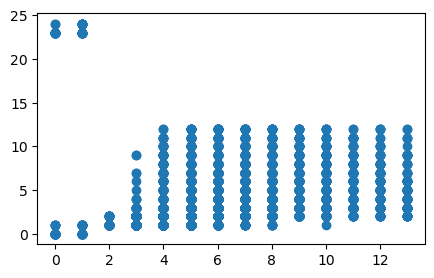

In [460]:
plt.scatter(sales["NumAppPurchases"], sales["NumTakeAwayPurchases"])
plt.show

In [461]:
centroids = model_k2.cluster_centers_
centroids

array([[0.33116   , 0.13981663, 0.25926726],
       [0.60930095, 0.48005529, 0.64938024]])

In [462]:
centroid_0_APP = centroids[0,0]
centroid_1_APP = centroids[1,0]
centroid_0_STORE = centroids[0,1]
centroid_1_STORE = centroids[1,1]
centroid_0_TKAWAY = centroids[0,2]
centroid_1_TKAWAY = centroids[1,2]

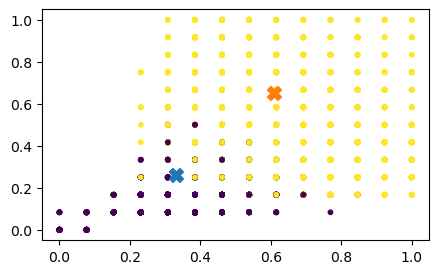

In [463]:
plt.scatter(sales_vc_k2.NumAppPurchases, sales_vc_k2.NumTakeAwayPurchases,
            c=sales_vc_k2.k_label, s=10)

plt.scatter(centroid_0_APP, centroid_0_TKAWAY, marker='X', s=100)
plt.scatter(centroid_1_APP, centroid_1_TKAWAY, marker='X', s=100)

plt.show()

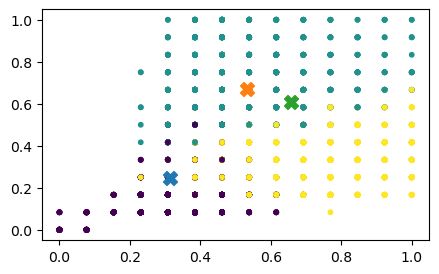

In [464]:
centroids = model_k3.cluster_centers_
centroids

centroid_0_APP = centroids[0,0]
centroid_1_APP = centroids[1,0]
centroid_2_APP = centroids[2,0]
centroid_0_STORE = centroids[0,1]
centroid_1_STORE = centroids[1,1]
centroid_2_STORE = centroids[2,1]
centroid_0_TKAWAY = centroids[0,2]
centroid_1_TKAWAY = centroids[1,2]
centroid_2_TKAWAY = centroids[2,2]



plt.scatter(sales_vc_k3.NumAppPurchases, sales_vc_k3.NumTakeAwayPurchases,
            c=sales_vc_k3.k_label, s=10)

plt.scatter(centroid_0_APP, centroid_0_TKAWAY, marker='X', s=100)
plt.scatter(centroid_1_APP, centroid_1_TKAWAY, marker='X', s=100)
plt.scatter(centroid_2_APP, centroid_2_TKAWAY, marker='X', s=100)

plt.show()

<div class="alert alert-block alert-info">
    
<a id='stats_num'></a>

### DBSCAN clustering 
    
</div>

Ran the code of this site: https://www.reneshbedre.com/blog/dbscan-python.html?utm_content=cmp-true

In [465]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors = 20).fit(sales_vc_minmax)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(sales_vc_minmax)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

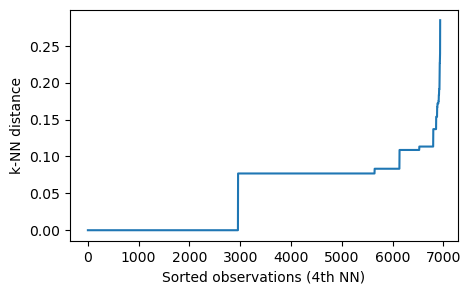

In [466]:
import matplotlib.pyplot as plt
k_dist = sort_neigh_dist[:, 19]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()


- Identifying the exact knee point could be difficult visually. In the below plot, the knee point can occur at any point between 1 to 2 i.e. the points below knee point belong to a cluster, and points above the knee point are noise or outliers (noise points will have higher kNN distance). You should run DBSCAN based on different values of ε (between 1 and 2) to find the best ε that gives the best clustering.

- Additionally, to get an estimate of knee point, you can use the KneeLocator() function from the kneed package.

In [467]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [468]:
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

0.23950694477268478


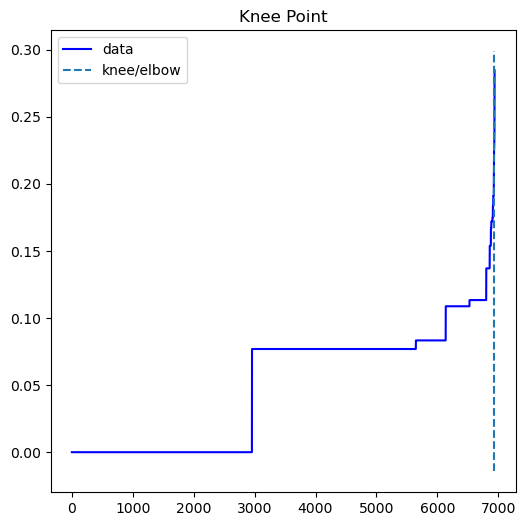

In [469]:
#distance plot
kneedle.plot_knee()
plt.show()

In [470]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps = 1.0714574598551223, min_samples = 2).fit(sales_vc_minmax)

In [471]:
# get cluster labels
clusters.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [472]:
# check unique clusters
set(clusters.labels_)

{0}

In [473]:
from collections import Counter
Counter(clusters.labels_)

Counter({0: 6939})

Visualization of DBSCAN clustering

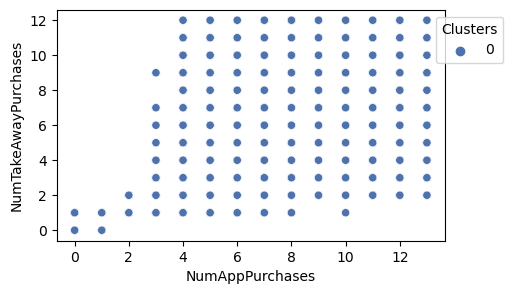

In [474]:
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.scatterplot(data = sales_vc, x = "NumAppPurchases", y = "NumTakeAwayPurchases", hue = clusters.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()

## ran the code of this site: https://www.section.io/engineering-education/dbscan-clustering-in-python/

In [475]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(sales_vc) # fitting the data to the object
distances,indices=nbrs.kneighbors(sales_vc) # finding the nearest neighbours

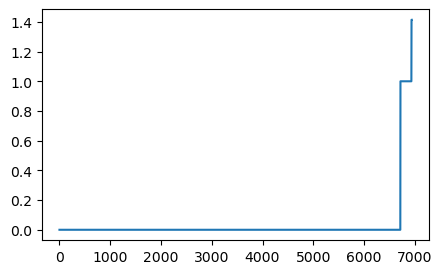

In [476]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot


<div class="alert alert-block alert-info">
    
<a id='stats_num'></a>

### Fuzzy clustering/c-means
    
    #https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_cmeans.html
#(source) FPC method for finding whether a fuzzyness value, m, is optimal
    
</div>

In [477]:
!pip install scikit-fuzzy

In [478]:
#Find the level of fuzzinness m, for k=3, using Fuzzy Partition Coefficient, trying multiple values for error

import numpy as np
import skfuzzy as fuzz
from sklearn.datasets import make_blobs

for error in np.arange(0.1, 5.1, 0.1):
    data=sales_vc_minmax.copy()
    # Perform fuzzy clustering with optimal number of clusters
    cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(data.T, 3, 2, error, maxiter=10000, init=None)

    # Find the optimal fuzziness
    optimal_fuzziness = np.argmax(fpc)
    print("Optimal fuzziness:", optimal_fuzziness)


Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzzi

In [479]:
#Find the level of fuzzinness m, for k=4, using Fuzzy Partition Coefficient, trying multiple values for error
#FPC is between 0 and 1, the closer it is to 0, the less the model os effective in partitioning our data

import numpy as np
import skfuzzy as fuzz

for error in np.arange(0.1, 3.1, 0.1):
    for m in np.arange(1, 5, 1):
        data=sales_vc_minmax.copy()
        # Perform fuzzy clustering with optimal number of clusters
        cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(data.T, 4, m, error, maxiter=150, init=None)

        # Find the optimal fuzziness
        optimal_fuzziness = np.argmax(fpc)
        print("Optimal fuzziness:", optimal_fuzziness)

Optimal fuzziness: 0


C:\Users\J Loureiro\anaconda3\lib\site-packages\skfuzzy\cluster\_cmeans.py:33: RuntimeWarning: divide by zero encountered in true_divide
  u = normalize_power_columns(d, - 2. / (m - 1))


Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzzi

In [480]:
#from the values we got on the FPC, it's clear that fuzzy clustering is not at all appropriate to analyze our data set

In [481]:
import numpy as np
import skfuzzy as fuzz

fuzzy=sales_vc_minmax.copy()

# Set the number of clusters
k = 4

# Set the fuzziness parameter
m = 2

# Initialize the cluster centers
centers, u, _, _, _, _, _ = fuzz.cluster.cmeans(fuzzy.T, k, m, error=0.005, maxiter=1000, init=None)

# Get the cluster labels for each data point
labels = np.argmax(u, axis=0)

# Print the cluster centers and labels
print("Cluster centers:")
print(centers)
print("Cluster labels:")
print(labels)

Cluster centers:
[[0.28829621 0.11827409 0.23150148]
 [0.60295426 0.4318744  0.81036183]
 [0.60420504 0.28027655 0.45990212]
 [0.54904221 0.66730734 0.58214746]]
Cluster labels:
[1 3 2 ... 1 0 0]


In [482]:
#Further testing---- vizualization of innefectiveness for m (fuzzynness)=2

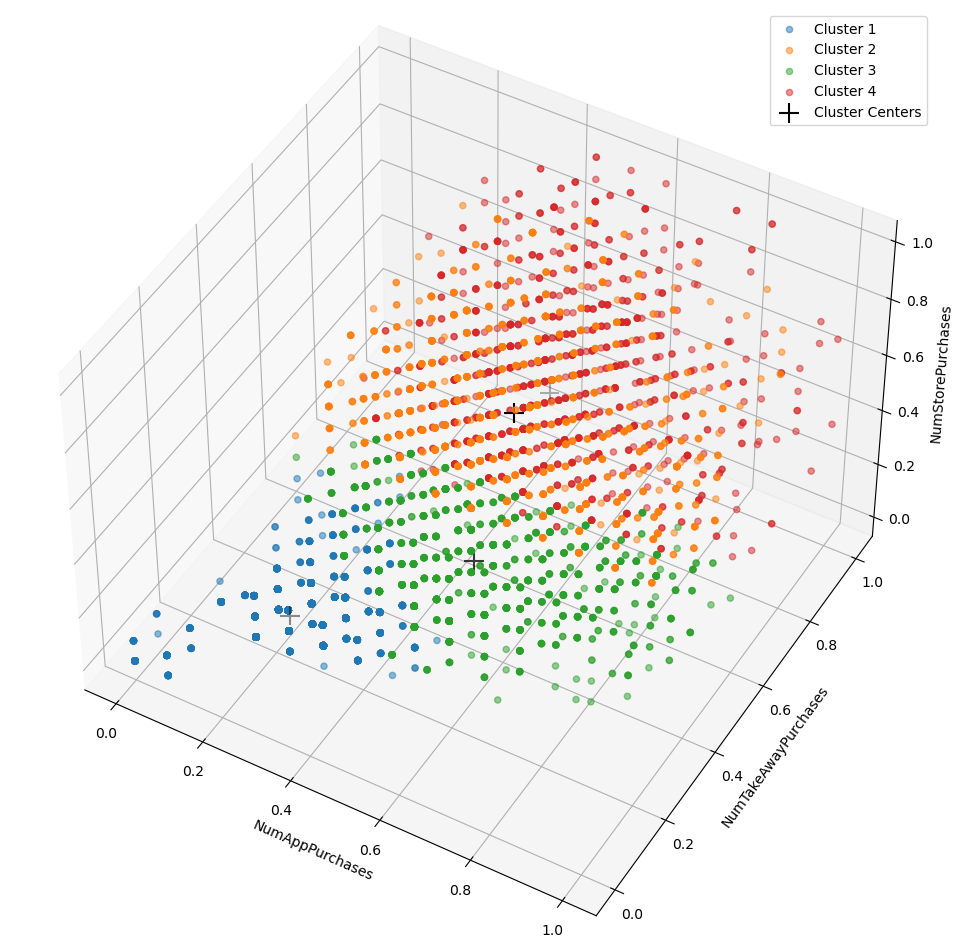

In [483]:
# Create a 3D plot
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points colored by cluster label
for i in range(k):
    ax.scatter(sales_vc_minmax.iloc[labels==i, 0], sales_vc_minmax.iloc[labels==i, 1], sales_vc_minmax.iloc[labels==i, 2], alpha=0.5, label="Cluster "+str(i+1))

# Plot the cluster centers
ax.scatter(centers[:,0], centers[:,1], centers[:,2], color='black', marker='+', s=200, label="Cluster Centers")

# Add legend and axis labels
ax.set_xlabel('NumAppPurchases')
ax.set_ylabel('NumTakeAwayPurchases')
ax.set_zlabel('NumStorePurchases')
ax.legend()

# Set the viewing angle
ax.view_init(elev=45, azim=-60)

# Show the plot
plt.show()


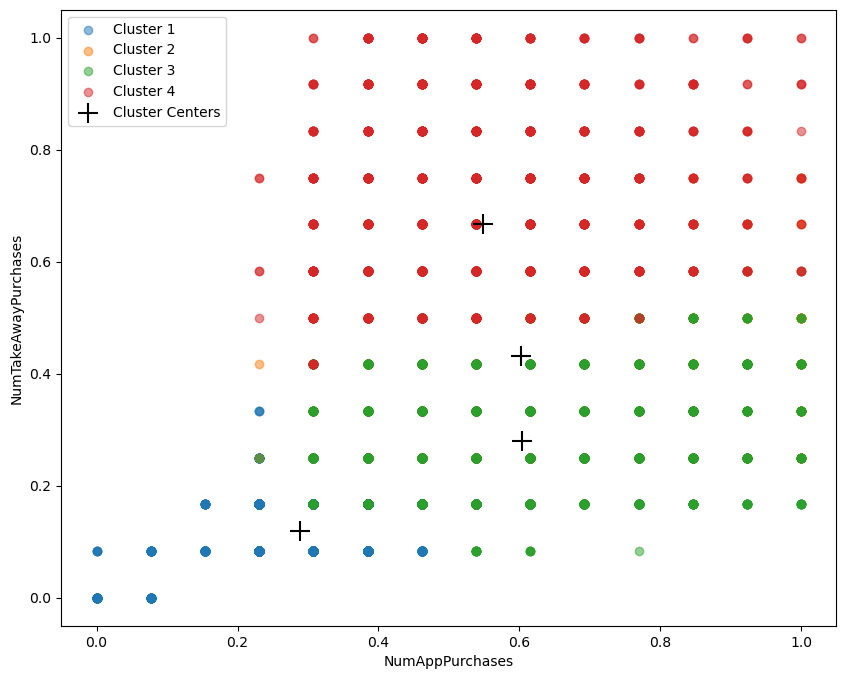

In [484]:
# Create a 2D plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the data points colored by cluster label
for i in range(k):
    ax.scatter(sales_vc_minmax.iloc[labels==i, 0], sales_vc_minmax.iloc[labels==i, 1], alpha=0.5, label="Cluster "+str(i+1))

# Plot the cluster centers
ax.scatter(centers[:,0], centers[:,1], color='black', marker='+', s=200, label="Cluster Centers")

# Add legend and axis labels
ax.set_xlabel('NumAppPurchases')
ax.set_ylabel('NumTakeAwayPurchases')
ax.legend()

# Show the plot
plt.show()


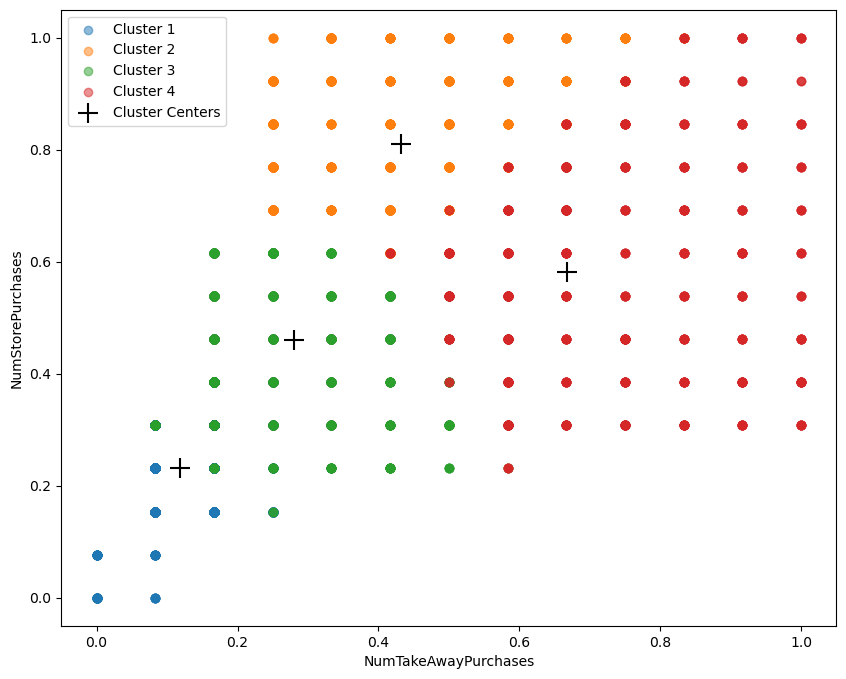

In [485]:
# Create a 2D plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the data points colored by cluster label
for i in range(k):
    ax.scatter(sales_vc_minmax.iloc[labels==i, 1], sales_vc_minmax.iloc[labels==i, 2], alpha=0.5, label="Cluster "+str(i+1))

# Plot the cluster centers
ax.scatter(centers[:,1], centers[:,2], color='black', marker='+', s=200, label="Cluster Centers")

# Add legend and axis labels
ax.set_xlabel('NumTakeAwayPurchases')
ax.set_ylabel('NumStorePurchases')
ax.legend()

# Show the plot
plt.show()


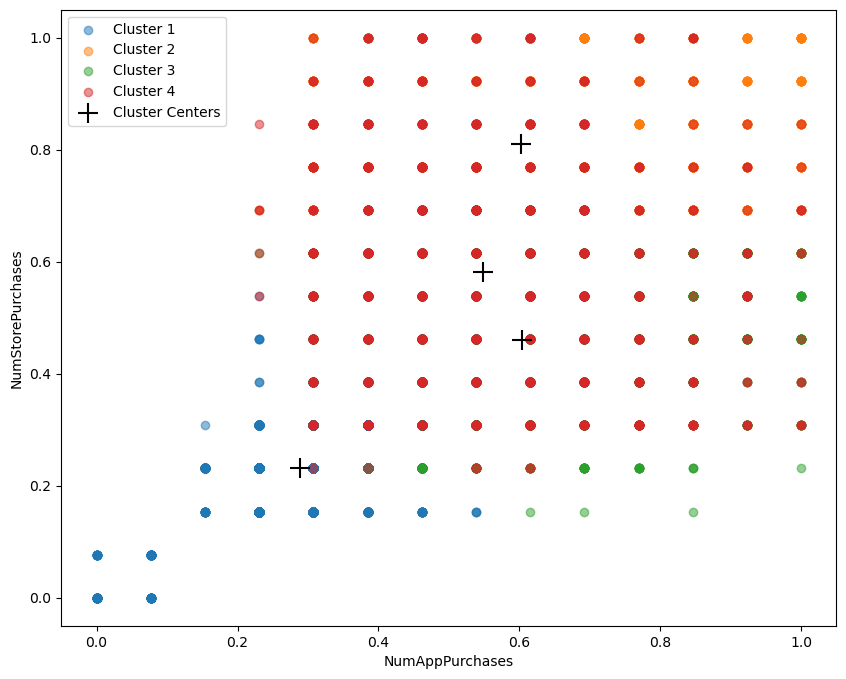

In [486]:
# Create a 2D plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the data points colored by cluster label
for i in range(k):
    ax.scatter(sales_vc_minmax.iloc[labels==i, 0], sales_vc_minmax.iloc[labels==i, 2], alpha=0.5, label="Cluster "+str(i+1))

# Plot the cluster centers
ax.scatter(centers[:,0], centers[:,2], color='black', marker='+', s=200, label="Cluster Centers")

# Add legend and axis labels
ax.set_xlabel('NumAppPurchases')
ax.set_ylabel('NumStorePurchases')
ax.legend()

# Show the plot
plt.show()


In [487]:
#and for m=4...

In [488]:
import numpy as np
import skfuzzy as fuzz

fuzzy=sales_vc_minmax.copy()

# Set the number of clusters
k = 4

# Set the fuzziness parameter
m = 4

# Initialize the cluster centers
centers, u, _, _, _, _, _ = fuzz.cluster.cmeans(fuzzy.T, k, m, error=0.005, maxiter=1000, init=None)

# Get the cluster labels for each data point
labels = np.argmax(u, axis=0)

# Print the cluster centers and labels
print("Cluster centers:")
print(centers)
print("Cluster labels:")
print(labels)

Cluster centers:
[[0.58694238 0.44570925 0.62267195]
 [0.28165955 0.10793655 0.23101412]
 [0.58172724 0.49845931 0.690276  ]
 [0.52736987 0.29298432 0.44094249]]
Cluster labels:
[2 2 3 ... 2 1 1]


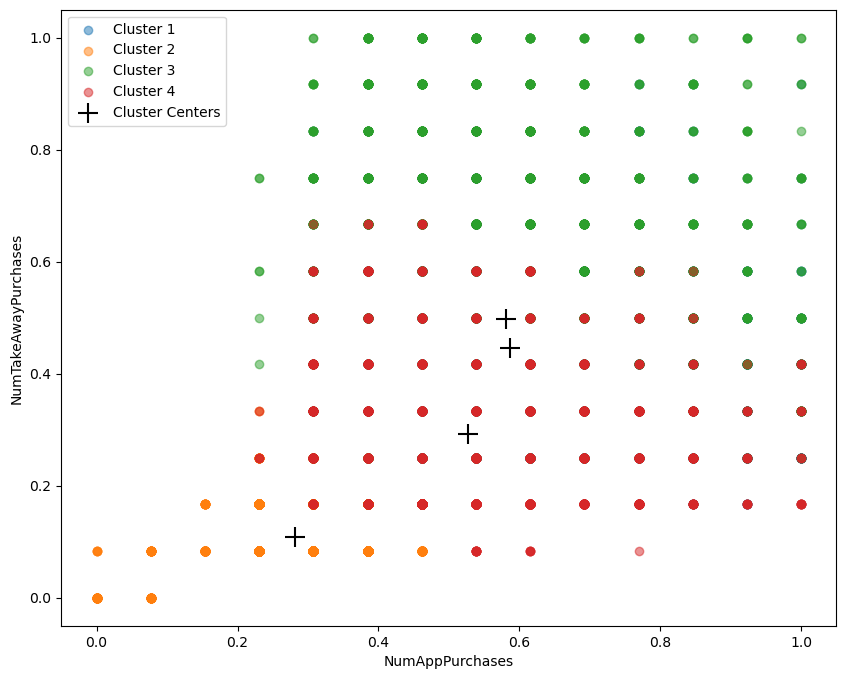

In [489]:
# Create a 2D plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the data points colored by cluster label
for i in range(k):
    ax.scatter(sales_vc_minmax.iloc[labels==i, 0], sales_vc_minmax.iloc[labels==i, 1], alpha=0.5, label="Cluster "+str(i+1))

# Plot the cluster centers
ax.scatter(centers[:,0], centers[:,1], color='black', marker='+', s=200, label="Cluster Centers")

# Add legend and axis labels
ax.set_xlabel('NumAppPurchases')
ax.set_ylabel('NumTakeAwayPurchases')
ax.legend()

# Show the plot
plt.show()

In [490]:
#https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_cmeans.html
#source for FPC method for finding whether a fuzzyness m is optimal

In [491]:
#fuzzy clustering doesn't seem appropriate...

In [494]:
#BACK TO REGULAR KMEANS; K=4

In [495]:
cluster0 = sales_vc_k4[sales_vc_k4.k_label==0]
cluster1 = sales_vc_k4[sales_vc_k4.k_label==1]
cluster2 = sales_vc_k4[sales_vc_k4.k_label==2]
cluster3 = sales_vc_k4[sales_vc_k4.k_label==3]

In [496]:
crm=pd.read_csv(r'C:\Users\J Loureiro\Desktop\Enterprise Data Science and Advanced Analytics\Data Science and Machine Learning\Project 1\crm.csv')

In [497]:
crm

,CustomerID,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18
0,14594,Miss Leah Lewis,1981,Graduation,Single,113947.0,0,0
1,19070,Miss Grace Black,1974,Graduation,Together,114297.0,0,0
2,29888,Mr. Gavin Morrison,1960,PhD,Together,115476.0,0,0
3,12221,Mr. Ryan Glover,1980,Graduation,Married,101172.0,1,1
4,21107,Mr. Paul Anderson,1971,HighSchool,Single,123128.0,0,0
...,...,...,...,...,...,...,...,...
6995,30686,Mr. John Hughes,1994,PhD,Divorced,98968.0,0,0
6996,17210,Mr. Brandon Simpson,1985,Graduation,Divorced,109977.0,0,0
6997,29186,Mr. Thomas Churchill,1967,PhD,Together,56039.0,0,1
6998,23312,Miss Angela Murray,1989,Graduation,Single,44867.0,1,0


In [498]:
crm['Education'] = crm['Education'].str.upper()

In [499]:
crm['Marital_Status']=crm['Marital_Status'].str.upper()

In [500]:
#3.1 birthyear into age


#first, we convert the birthyear to an 'age' column

import datetime
    
 #calculate the current year
current_year = datetime.datetime.now().year

 #create a new column 'age' by subtracting birth_year from current year
crm['age'] = current_year - crm['Birthyear']

# drop
crm = crm.drop('Birthyear', axis=1)

In [501]:
#Now, we do the encoding. If the first 4 characters contain any variation of mrs or miss, we substitute the name by 1
#if it's any variation of 'mr.' we substitute by 0

# create a copy of the 'Name' column
crm['Gender'] = crm['Name']

# replace 'Miss' or 'Mrs.' with 1 and 'Mr.' with 0 in the 'Gender' column
crm.loc[crm['Gender'].str.contains(r'^((M|m)iss|(M|m)rs\.)', na=False), 'Gender'] = 1
crm.loc[crm['Gender'].str.contains(r'^(Mr\.|(M|m)r)', na=False), 'Gender'] = 0

# convert the 'Gender' column to integer type
crm['Gender'] = crm['Gender'].astype(float).fillna(0).astype(int)

#check new column
crm['Gender']

C:\Users\J Loureiro\AppData\Local\Temp\ipykernel_27352\298880669.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  crm.loc[crm['Gender'].str.contains(r'^((M|m)iss|(M|m)rs\.)', na=False), 'Gender'] = 1
C:\Users\J Loureiro\AppData\Local\Temp\ipykernel_27352\298880669.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  crm.loc[crm['Gender'].str.contains(r'^(Mr\.|(M|m)r)', na=False), 'Gender'] = 0


0       1
1       1
2       0
3       0
4       0
       ..
6995    0
6996    0
6997    0
6998    1
6999    1
Name: Gender, Length: 7000, dtype: int32

In [502]:
crm

,CustomerID,Name,Education,Marital_Status,Income,Kid_Younger6,Children_6to18,age,Gender
0,14594,Miss Leah Lewis,GRADUATION,SINGLE,113947.0,0,0,42,1
1,19070,Miss Grace Black,GRADUATION,TOGETHER,114297.0,0,0,49,1
2,29888,Mr. Gavin Morrison,PHD,TOGETHER,115476.0,0,0,63,0
3,12221,Mr. Ryan Glover,GRADUATION,MARRIED,101172.0,1,1,43,0
4,21107,Mr. Paul Anderson,HIGHSCHOOL,SINGLE,123128.0,0,0,52,0
...,...,...,...,...,...,...,...,...,...
6995,30686,Mr. John Hughes,PHD,DIVORCED,98968.0,0,0,29,0
6996,17210,Mr. Brandon Simpson,GRADUATION,DIVORCED,109977.0,0,0,38,0
6997,29186,Mr. Thomas Churchill,PHD,TOGETHER,56039.0,0,1,56,0
6998,23312,Miss Angela Murray,GRADUATION,SINGLE,44867.0,1,0,34,1


In [503]:
crm_view=crm.copy()

In [504]:
cluster0 = sales_vc_k4[sales_vc_k4.k_label==0]
cluster1 = sales_vc_k4[sales_vc_k4.k_label==1]
cluster2 = sales_vc_k4[sales_vc_k4.k_label==2]
cluster3 = sales_vc_k4[sales_vc_k4.k_label==3]

In [505]:
#DEMOGRAPHICS COMPARISONS!!!!!


conclusions0 = pd.concat([cluster0.reset_index(drop=True), crm_view.reset_index(drop=True)], axis=1, join='inner')
conclusions1 = pd.concat([cluster1.reset_index(drop=True), crm_view.reset_index(drop=True)], axis=1, join='inner')
conclusions2 = pd.concat([cluster2.reset_index(drop=True), crm_view.reset_index(drop=True)], axis=1, join='inner')
conclusions3 = pd.concat([cluster3.reset_index(drop=True), crm_view.reset_index(drop=True)], axis=1, join='inner')

In [506]:
conclusions0.head(2)

,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,k_label,CustomerID,Name,Education,Marital_Status,Income,Kid_Younger6,Children_6to18,age,Gender
0,0.538462,0.750000,0.615385,0,14594,Miss Leah Lewis,GRADUATION,SINGLE,113947.0,0,0,42,1
1,0.384615,0.666667,0.615385,0,19070,Miss Grace Black,GRADUATION,TOGETHER,114297.0,0,0,49,1


In [507]:
conclusions0.describe()

,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,k_label,CustomerID,Income,Kid_Younger6,Children_6to18,age,Gender
count,866.000000,866.000000,866.000000,866.0,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000
mean,0.540593,0.722864,0.496802,0.0,20466.794457,79836.634873,0.445727,0.472286,46.939954,0.263279
std,0.155951,0.154523,0.154932,0.0,8866.347950,35535.600632,0.552398,0.541711,12.059433,0.440667
min,0.230769,0.500000,0.230769,0.0,5078.000000,4609.600000,0.000000,0.000000,18.000000,0.000000
25%,0.461538,0.583333,0.384615,0.0,12434.750000,53514.750000,0.000000,0.000000,38.000000,0.000000
50%,0.538462,0.666667,0.461538,0.0,20801.000000,79477.500000,0.000000,0.000000,46.000000,0.000000
75%,0.615385,0.833333,0.615385,0.0,28180.250000,103483.000000,1.000000,1.000000,56.000000,1.000000
max,1.000000,1.000000,0.923077,0.0,35072.000000,237639.725000,2.000000,2.000000,74.000000,1.000000


In [508]:
conclusions1.describe()

,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,k_label,CustomerID,Income,Kid_Younger6,Children_6to18,age,Gender
count,2974.000000,2974.000000,2974.000000,2974.0,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000
mean,0.293725,0.122646,0.233330,1.0,20080.887021,78328.700731,0.441157,0.483188,46.465703,0.267653
std,0.092101,0.062403,0.076361,0.0,8699.409307,35493.753205,0.541951,0.543642,11.987212,0.442810
min,0.000000,0.000000,0.000000,1.0,5078.000000,3005.400000,0.000000,0.000000,18.000000,0.000000
25%,0.230769,0.083333,0.230769,1.0,12470.000000,51289.750000,0.000000,0.000000,37.000000,0.000000
50%,0.307692,0.083333,0.230769,1.0,20238.500000,77533.500000,0.000000,0.000000,46.000000,0.000000
75%,0.384615,0.166667,0.307692,1.0,27664.250000,102446.500000,1.000000,1.000000,56.000000,1.000000
max,0.538462,0.500000,0.615385,1.0,35072.000000,237639.725000,2.000000,2.000000,75.000000,1.000000


In [509]:
conclusions2.describe()

,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,k_label,CustomerID,Income,Kid_Younger6,Children_6to18,age,Gender
count,1744.000000,1744.000000,1744.000000,1744.0,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000
mean,0.621692,0.281059,0.480946,2.0,20187.503440,78173.096287,0.448394,0.483945,46.399083,0.268922
std,0.169122,0.100195,0.121340,0.0,8813.027223,34988.851228,0.547961,0.540686,12.012525,0.443527
min,0.230769,0.083333,0.153846,2.0,5078.000000,3005.400000,0.000000,0.000000,18.000000,0.000000
25%,0.461538,0.166667,0.384615,2.0,12344.000000,50769.000000,0.000000,0.000000,37.000000,0.000000
50%,0.615385,0.250000,0.461538,2.0,20369.000000,77771.500000,0.000000,0.000000,45.000000,0.000000
75%,0.769231,0.333333,0.615385,2.0,27937.250000,102572.000000,1.000000,1.000000,56.000000,1.000000
max,1.000000,0.583333,0.692308,2.0,35072.000000,237639.725000,2.000000,2.000000,74.000000,1.000000


In [510]:
conclusions3.describe()

,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,k_label,CustomerID,Income,Kid_Younger6,Children_6to18,age,Gender
count,1355.000000,1355.000000,1355.000000,1355.0,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000
mean,0.598524,0.470787,0.851036,3.0,20313.498893,78342.207823,0.447232,0.469373,46.509225,0.264207
std,0.183748,0.173401,0.102892,0.0,8870.743903,34894.202266,0.548246,0.534952,12.066979,0.441073
min,0.230769,0.250000,0.615385,3.0,5078.000000,3005.400000,0.000000,0.000000,18.000000,0.000000
25%,0.461538,0.333333,0.769231,3.0,12446.000000,51193.500000,0.000000,0.000000,37.000000,0.000000
50%,0.538462,0.416667,0.846154,3.0,20450.000000,77798.000000,0.000000,0.000000,46.000000,0.000000
75%,0.692308,0.583333,0.923077,3.0,28304.000000,102853.500000,1.000000,1.000000,56.000000,1.000000
max,1.000000,1.000000,1.000000,3.0,35072.000000,237639.725000,2.000000,2.000000,74.000000,1.000000


In [511]:
#average income is slightly higher on our first group. The other characteristics are similar on the different groups

In [512]:
conclusions0.groupby('Education')['Education'].agg(['count']).apply(lambda x: x/x.sum()*100, axis=0)

,count
Education,
BASIC,2.777778
GRADUATION,48.379630
HIGHSCHOOL,10.995370
MASTER,17.245370
PHD,20.601852


In [513]:
conclusions1.groupby('Education')['Education'].agg(['count']).apply(lambda x: x/x.sum()*100, axis=0)

,count
Education,
BASIC,2.730951
GRADUATION,49.561699
HIGHSCHOOL,9.946055
MASTER,17.026298
PHD,20.734997


In [514]:
conclusions2.groupby('Education')['Education'].agg(['count']).apply(lambda x: x/x.sum()*100, axis=0)

,count
Education,
BASIC,2.699598
GRADUATION,48.650201
HIGHSCHOOL,10.511200
MASTER,16.542217
PHD,21.596783


In [515]:
conclusions3.groupby('Education')['Education'].agg(['count']).apply(lambda x: x/x.sum()*100, axis=0)

,count
Education,
BASIC,2.662722
GRADUATION,48.816568
HIGHSCHOOL,10.059172
MASTER,16.494083
PHD,21.967456


In [516]:
#nothing to differentiate each group when it comes to Education level

In [517]:
conclusions0.groupby('Marital_Status')['Marital_Status'].agg(['count']).apply(lambda x: x/x.sum()*100, axis=0)

,count
Marital_Status,
DIVORCED,11.085450
MARRIED,40.646651
SINGLE,22.401848
TOGETHER,22.055427
WIDOW,3.810624


In [518]:
conclusions1.groupby('Marital_Status')['Marital_Status'].agg(['count']).apply(lambda x: x/x.sum()*100, axis=0)

,count
Marital_Status,
DIVORCED,9.952925
MARRIED,40.954943
SINGLE,21.318090
TOGETHER,24.209818
WIDOW,3.564223


In [519]:
conclusions2.groupby('Marital_Status')['Marital_Status'].agg(['count']).apply(lambda x: x/x.sum()*100, axis=0)

,count
Marital_Status,
DIVORCED,9.977064
MARRIED,40.940367
SINGLE,22.190367
TOGETHER,23.394495
WIDOW,3.497706


In [520]:
conclusions3.groupby('Marital_Status')['Marital_Status'].agg(['count']).apply(lambda x: x/x.sum()*100, axis=0)

,count
Marital_Status,
DIVORCED,10.258303
MARRIED,40.959410
SINGLE,21.918819
TOGETHER,23.542435
WIDOW,3.321033


In [521]:
#In here, we start to see some slight differences. In our first group there's slightly more people that are not married nor together

In [522]:
#MARKETINGMARKETINGMARKETING

In [523]:
df_mkt= pd.read_csv ('marketing.csv')

In [524]:
df_mkt.rename(columns =
                    {"Response_Cmp1" : "Cmp1", "Response_Cmp2" : "Cmp2", 
                     "Response_Cmp3": "Cmp3", "Response_Cmp4" : "Cmp4", 
                    "Response_Cmp5" : "Cmp5"}, inplace= True
             )

In [525]:
df_mkt.drop_duplicates(subset=['CustomerID'], inplace=True)

In [526]:
cluster0 = sales_vc_k4[sales_vc_k4.k_label==0]
cluster1 = sales_vc_k4[sales_vc_k4.k_label==1]
cluster2 = sales_vc_k4[sales_vc_k4.k_label==2]
cluster3 = sales_vc_k4[sales_vc_k4.k_label==3]

In [527]:
conc_mkt0 = pd.concat([cluster0.reset_index(drop=True), df_mkt.reset_index(drop=True)], axis=1, join='inner')
conc_mkt1 = pd.concat([cluster1.reset_index(drop=True), df_mkt.reset_index(drop=True)], axis=1, join='inner')
conc_mkt2 = pd.concat([cluster2.reset_index(drop=True), df_mkt.reset_index(drop=True)], axis=1, join='inner')
conc_mkt3 = pd.concat([cluster3.reset_index(drop=True), df_mkt.reset_index(drop=True)], axis=1, join='inner')

In [528]:
conc_mkt2.head(5)

,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,k_label,CustomerID,Cmp1,Cmp2,Cmp3,Cmp4,Cmp5
0,0.692308,0.416667,0.230769,2,31958,0,0,0,0,0
1,0.538462,0.333333,0.307692,2,5387,0,0,0,0,0
2,0.923077,0.166667,0.615385,2,32006,0,0,0,0,0
3,0.615385,0.166667,0.615385,2,7511,0,0,0,0,0
4,0.461538,0.166667,0.461538,2,12308,0,0,0,0,0


In [529]:
conc_mkt0.describe()

,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,k_label,CustomerID,Cmp1,Cmp2,Cmp3,Cmp4,Cmp5
count,866.000000,866.000000,866.000000,866.0,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000
mean,0.540593,0.722864,0.496802,0.0,19963.570439,0.083141,0.066975,0.081986,0.068129,0.016166
std,0.155951,0.154523,0.154932,0.0,8907.292754,0.276255,0.250122,0.274502,0.252113,0.126188
min,0.230769,0.500000,0.230769,0.0,5117.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.461538,0.583333,0.384615,0.0,12078.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.538462,0.666667,0.461538,0.0,20636.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.615385,0.833333,0.615385,0.0,27530.750000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.923077,0.0,35021.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [530]:
conc_mkt1.describe()

,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,k_label,CustomerID,Cmp1,Cmp2,Cmp3,Cmp4,Cmp5
count,2974.000000,2974.000000,2974.000000,2974.0,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000
mean,0.293725,0.122646,0.233330,1.0,20058.978144,0.080363,0.076664,0.079018,0.064223,0.012777
std,0.092101,0.062403,0.076361,0.0,8821.754540,0.271900,0.266103,0.269812,0.245191,0.112332
min,0.000000,0.000000,0.000000,1.0,5078.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.230769,0.083333,0.230769,1.0,12167.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.307692,0.083333,0.230769,1.0,20193.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.384615,0.166667,0.307692,1.0,27686.750000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.538462,0.500000,0.615385,1.0,35072.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [531]:
conc_mkt2.describe()

,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,k_label,CustomerID,Cmp1,Cmp2,Cmp3,Cmp4,Cmp5
count,1744.000000,1744.000000,1744.000000,1744.0,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000
mean,0.621692,0.281059,0.480946,2.0,20114.713876,0.084289,0.073394,0.079702,0.067087,0.012041
std,0.169122,0.100195,0.121340,0.0,8889.671095,0.277900,0.260858,0.270909,0.250245,0.109101
min,0.230769,0.083333,0.153846,2.0,5078.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.461538,0.166667,0.384615,2.0,12154.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.615385,0.250000,0.461538,2.0,20606.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.769231,0.333333,0.615385,2.0,27723.500000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.583333,0.692308,2.0,35066.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [532]:
conc_mkt3.describe()

,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,k_label,CustomerID,Cmp1,Cmp2,Cmp3,Cmp4,Cmp5
count,1355.000000,1355.000000,1355.000000,1355.0,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000
mean,0.598524,0.470787,0.851036,3.0,20124.693727,0.084133,0.075277,0.078229,0.065683,0.013284
std,0.183748,0.173401,0.102892,0.0,8870.390006,0.277689,0.263935,0.268630,0.247818,0.114531
min,0.230769,0.250000,0.615385,3.0,5078.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.461538,0.333333,0.769231,3.0,12158.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.538462,0.416667,0.846154,3.0,20777.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.692308,0.583333,0.923077,3.0,27579.500000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,3.0,35039.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [533]:
#as we knew cmp1 is the most successful and in our groups, remains the most successful.
#for the other campaigns: cmp2 was less successful on group 0 relative to the other ones, while cmp3 was slighly more successful
#As we knew from our initial analysis, cmp5 didn't perform very well
#it was more successful on group 0 though...